# Predicting Weight Loss for Fitbit Users

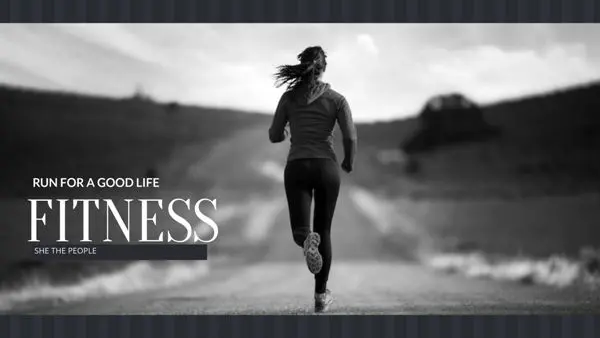

Fitbit is an activity tracker worn on the wrist just like a watch. It tracks your day-to-day activity automatically across a range of exercises like walking, running, swimming, cycling, or gym activity, and then stores this information in an easily-accessible app on your phone.

This Notebook uses Decision Tree Classifier, supervised learning algorithm that we will use to build a ML Model that can be used to classify weight loss based on the daily amount of calories burnt by the user.

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV

import graphviz 



In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Add panda options for column displays
#Print the long values in the columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 150

**OVERVIEW**

The is the capstone which is a culmination of our time in this program and is meant to showcase our ability to develop and answer a question of interest using the tools we have encountered. This project focuses on both our understanding of predictive modeling using a selection of algorithms covered in the program and our ability to communicate the findings.

#### General idea of the question that I want to ask

Fitness, Wellness and Wellbeing - Can I build ML models to predict the calories of an individual if we use features like exercise types, food intake, water consumption, supplement , dieting etc. What are the important features that would contribute to weight loss? Maybe extend the analysis to Mental health predictions


### Capstone CRISP-DM Overview

### Business Understanding

From a business perspective, I will be trying to identify the key drivers for the prediction question I am trying to answer, for example, for Fitness, Wellness and Wellbeing, are exercise, diet, food consumption the main drivers for weight loss.

#### Determine Business 

For the built model or ensemble of models, can we use it as a way for consumers to predict their weight loss over a period of time as opposed to the current method, where you do the following
- Enter your personal details like weight, height etc
- Enter your target/goals with regards to weight loss
- Track and log your exercise, food and water consumption
- Application displays the weight loss and progress towards your target



#### Assess Situation

Based on the limited work done to date, the main risk that I see is the lack of free quality data that could be used to create a model using the ML algorithms that we are learning on this course. As I refine my ML Question and do some data analysis, my assumptions may change or I may identify additional data sources.

The other issue may be the identification and use of infrastructure with adequate resources to run the algorithms with the data volumes required to produce a model with the right level of accuracy.

A contingency may be to use cloud computing resources which have the benefits of paying for usage but there will be a cost component to the Project.


#### Data Mining Goals

Quite simply, this will be the identification of data sets and analysis work on the data to figure out if the dataset would produce a model with the right level of accuracy.


### Data Understanding

Getting familiar with the data sets involves loading the identified dataset for the ML question, checking for missing data, correlation of the data as it relates to the the ML question, Outliers in the data sets

After considering the business understanding, we want to get familiar with our data. Write down some steps that you would take to get to know the dataset and identify any quality issues within. Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.


In [4]:
# Decribing the data that has been provided using Pandas functions
# Read daily activity log info data file into DataFrame
dailyactivity_df = pd.read_csv("../data/dailyActivity_merged.csv")

# Shape and preview
print('Weight Log Information DataFrame Shape :',dailyactivity_df.shape)
dailyactivity_df.head()

Weight Log Information DataFrame Shape : (940, 15)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
# Use Dataframe describe/view some basic statistical details like percentile, mean, std etc. of the dataset
dailyactivity_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [6]:
#List how many users are in this dataset
print("Number of Fitbit Users : " , dailyactivity_df.Id.value_counts().count())

Number of Fitbit Users :  33


In [7]:
# Exploring the data, lets start by describing the dataframe to get a list of provided attributes/features
dailyactivity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [8]:
# Print percentage of Columns that are null in relation to the total number of columns
for column in dailyactivity_df.columns:
    if dailyactivity_df[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(dailyactivity_df[column].isnull().sum() /
                                               dailyactivity_df[column].shape[0]))

In [9]:
#Check the number of Null Columns
dailyactivity_df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

There are no null features in the Dataset

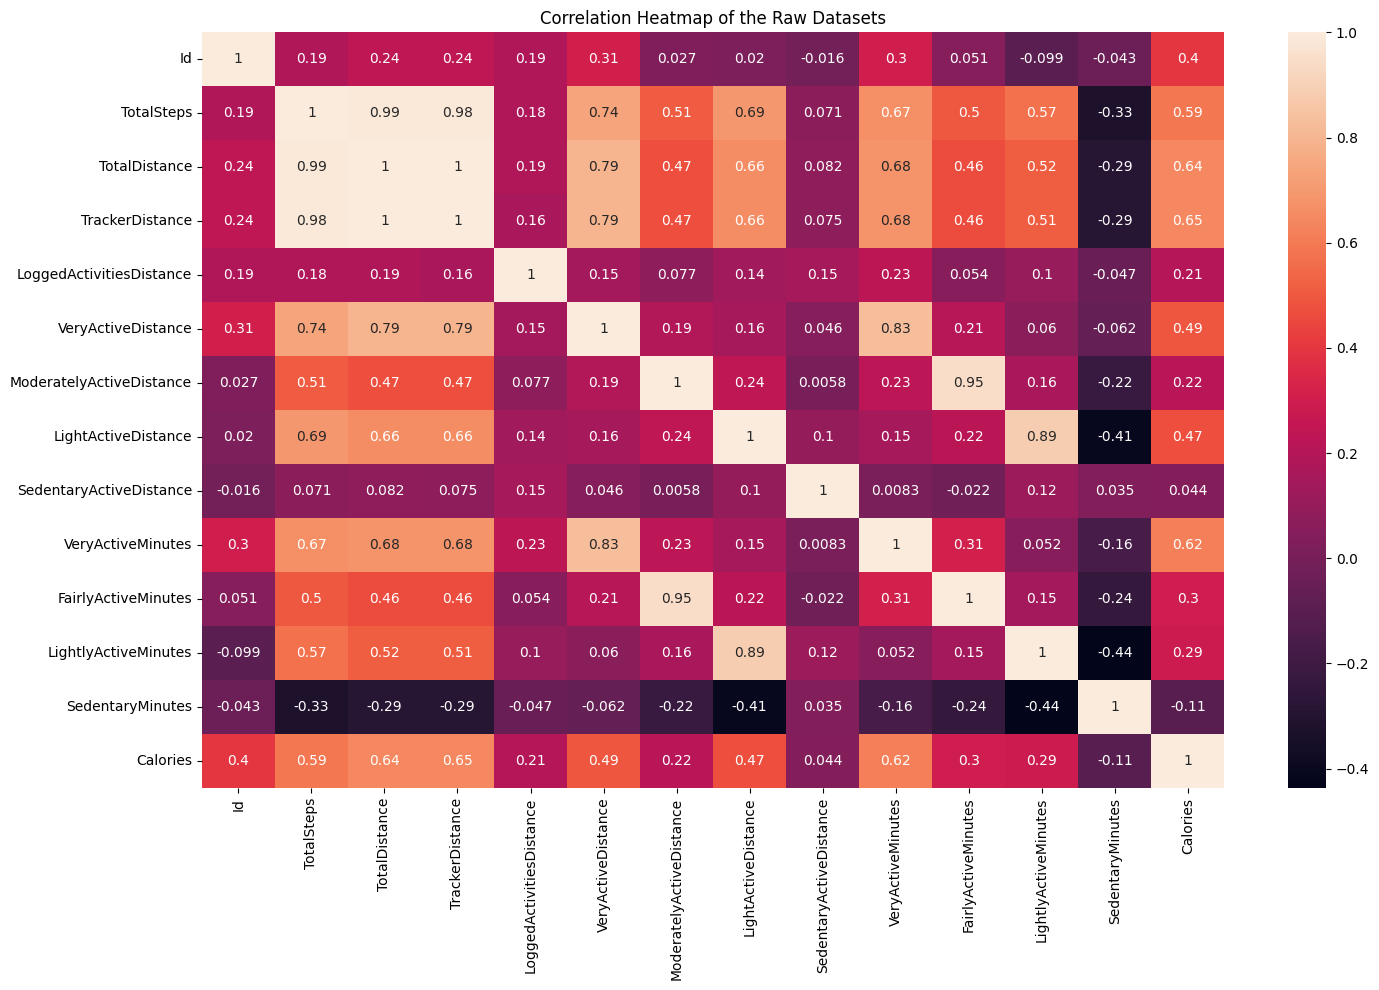

In [70]:
# Now lets look at some visualization of the provided datasets

fig, ax = plt.subplots(figsize=(15,10))
plt.rcParams["figure.autolayout"] = True

#create seaborn heatmap
ax = sns.heatmap(dailyactivity_df.corr(numeric_only=True), annot=True)

# Adding Title to the Plot
ax.set_title("Correlation Heatmap of the Raw Datasets")
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()

Strong correlation between Total Distance and Tracker Distance. Very Active Distance also shows a strong correlation with Total Distance and Tracker Distance features.

However, there is weak correlation across the board between the computed weight loss features and the other features.


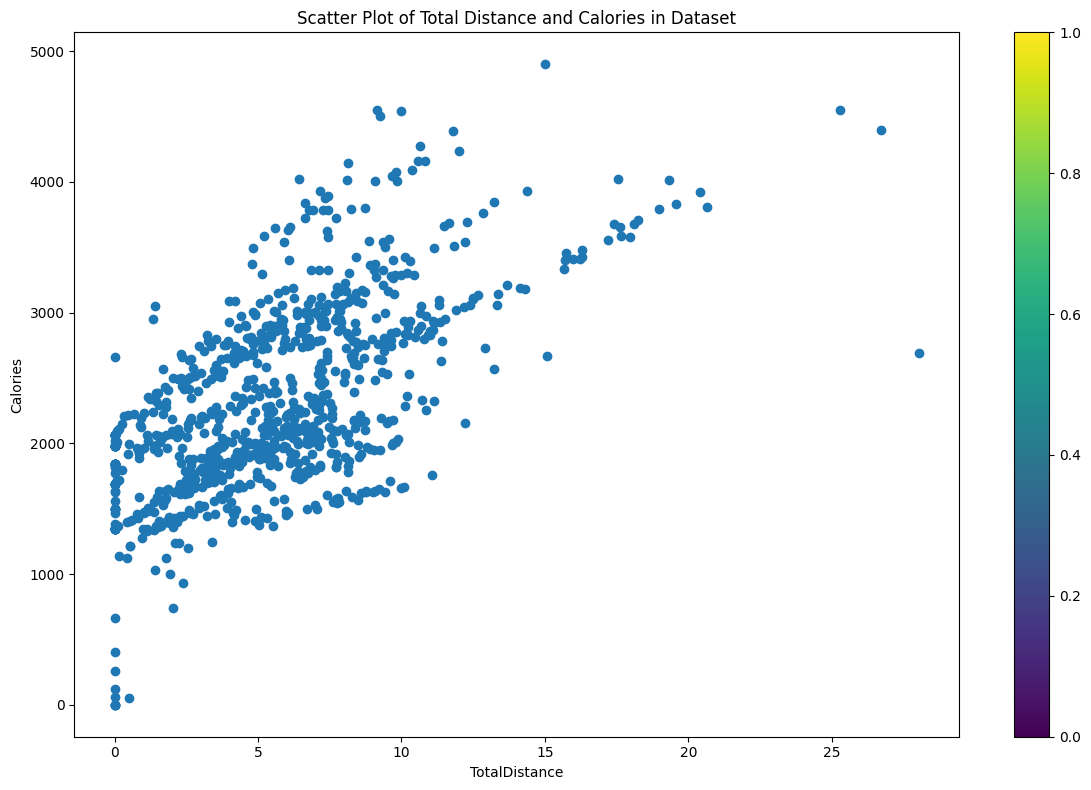

In [11]:
# Scatter plot of  Total Distance and Calories 
plt.figure(figsize=(12,8))
plt.scatter(dailyactivity_df['TotalDistance'], dailyactivity_df['Calories'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Total Distance and Calories in Dataset")
 
# Setting the X and Y labels
plt.xlabel('TotalDistance')
plt.ylabel('Calories')
plt.colorbar()
 
plt.show()

Some quick observations on the data
- clearly there are some zero values for Total Distance and Calories which we will need to clean up (i.e., remove) in data prep
- Concentration of users with total distance between 3 to 15 miles and Calories between 1000 to 4000
- Few outliers over 20 miles but still with Calories between 1000 to 4000. Although a couple over 25 miles with Calories over 4000
- Limited records with Total Distance over 25k miles and Calories over 4000


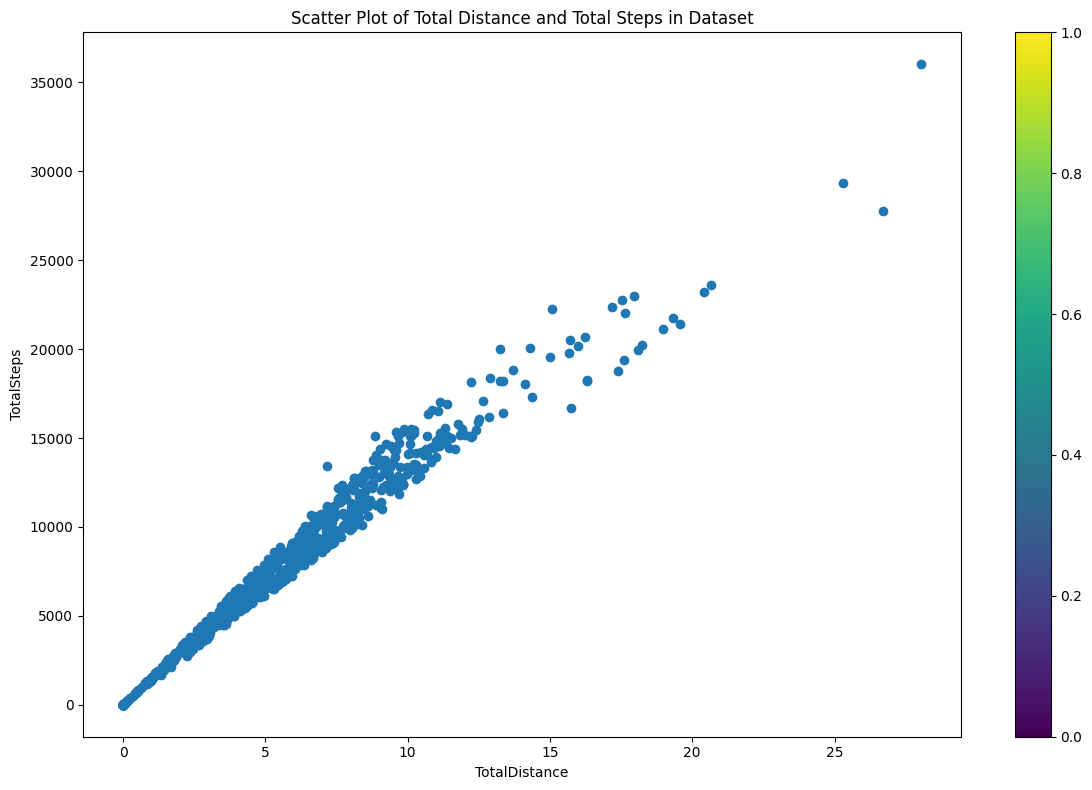

In [12]:
# Scatter plot of  Total Distance and Total Steps 
plt.figure(figsize=(12,8))
plt.scatter(dailyactivity_df['TotalDistance'], dailyactivity_df['TotalSteps'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Total Distance and Total Steps in Dataset")
 
# Setting the X and Y labels
plt.xlabel('TotalDistance')
plt.ylabel('TotalSteps')
plt.colorbar()
 
plt.show()

Strong correlation between Total Steps taken and Distance

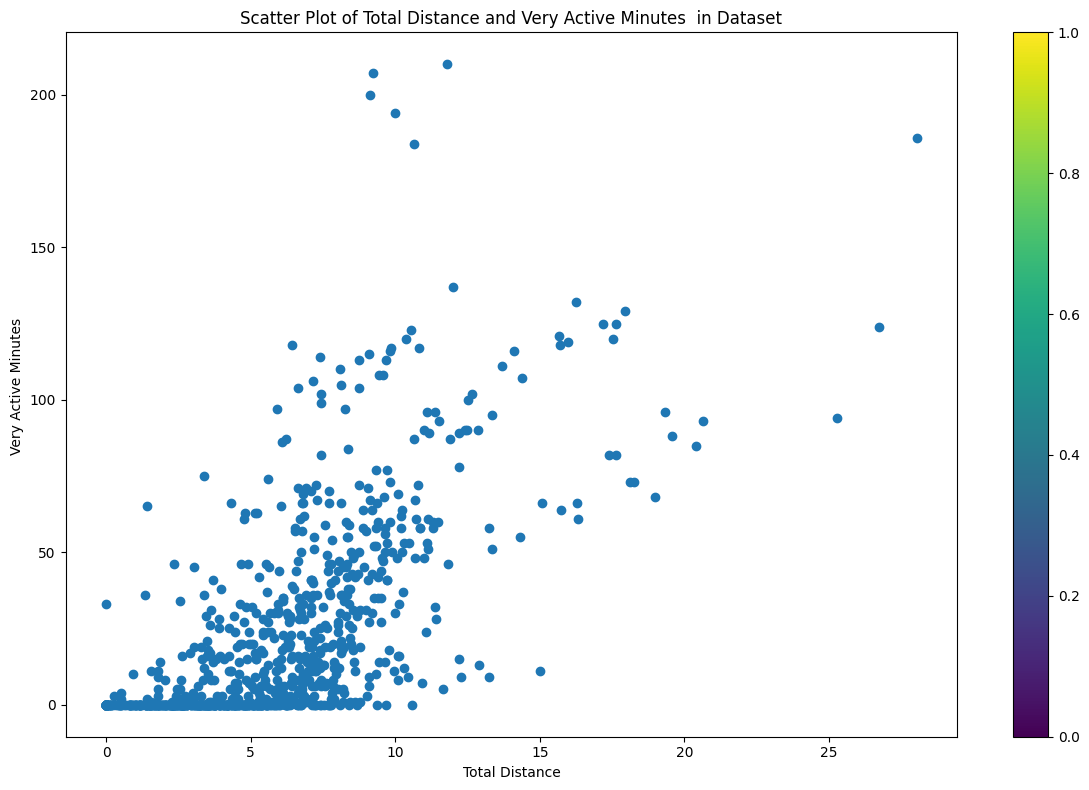

In [13]:
# Scatter plot of  Total Distance and Very Active Minutes 
plt.figure(figsize=(12,8))
plt.scatter(dailyactivity_df['TotalDistance'], dailyactivity_df['VeryActiveMinutes'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Total Distance and Very Active Minutes  in Dataset")
 
# Setting the X and Y labels
plt.xlabel('Total Distance')
plt.ylabel('Very Active Minutes ')
plt.colorbar()
 
plt.show()

Interesting observations with folks logging zero active minutes but recording values for Total Distance. Maybe Fitbit not working and bad data. These are candidates to be removed during data preparation (i.e., remove records where Very Active Minutes is zero)

We have 33 unique users in the dataset recording their activities over a number of days. Max no of days for some records is 31 days (i.e., one month)
Let's explore one user and visualize their activities over that one month period.

In [14]:
#Select a user from the dataset
dfuser1 = dailyactivity_df.query("`Id` == 1503960366")
dfuser1.head(5)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


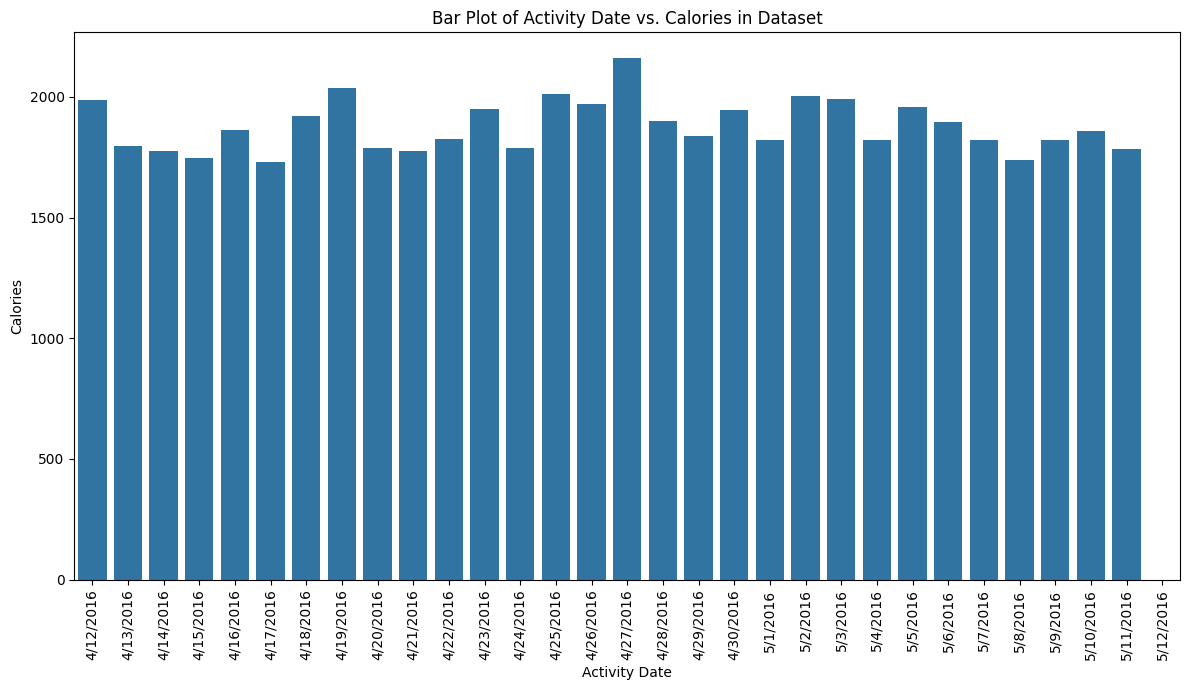

In [15]:
# Lets look at a bar plot of the Activity Date vs. Calories to see the distribution of data
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True

ax = sns.barplot(x=dfuser1["ActivityDate"], y=dfuser1["Calories"])


# Adding Title to the Plot
ax.set_title('Bar Plot of Activity Date vs. Calories in Dataset')

# Rotating X-axis labels
plt.xticks(rotation = 90)

# Setting the X and Y labels
ax.set_xlabel('Activity Date')
ax.set_ylabel('Calories')
 
# Show the plot
plt.show()


In [16]:
dfuser1["Calories"].mean()

np.float64(1816.4193548387098)

User `1503960366` is a fairly active users over the number of days in the dataset with average of `1816` calories over the number of days above

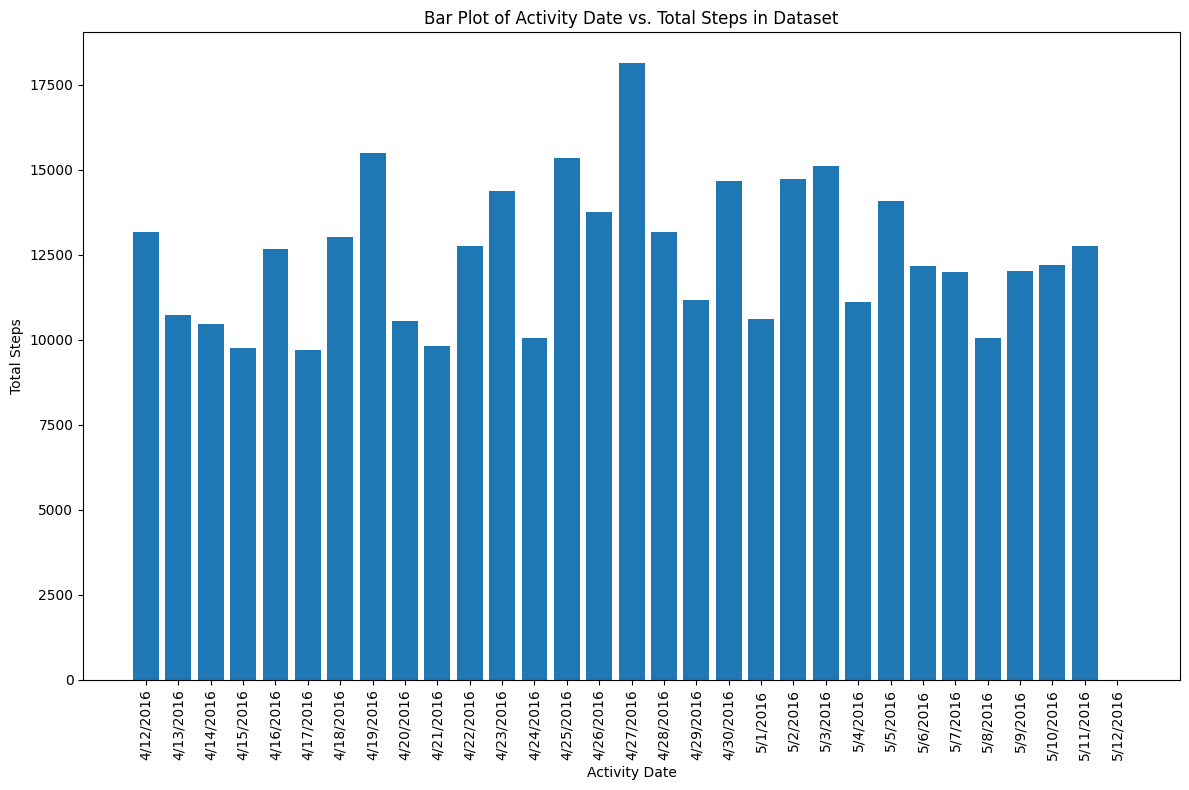

In [17]:
# Lets look at a bar plot of the Activity Date vs. Total Steps to see the distribution of data
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(dfuser1["ActivityDate"],dfuser1["TotalSteps"])
# set a title and labels
ax.set_title('Bar Plot of Activity Date vs. Total Steps in Dataset')

# Rotating X-axis labels
plt.xticks(rotation = 90)

ax.set_xlabel('Activity Date')
ax.set_ylabel('Total Steps')
plt.show()

In [18]:
dfuser1["TotalSteps"].mean()

np.float64(12116.741935483871)

The average number of steps for User `1503960366` is `12,116` and supports the average Calories recorded

In [19]:
#Check which columns have zero values
#dailyactivity_df.all()
s = dailyactivity_df.eq(0).any()
s

Id                          False
ActivityDate                False
TotalSteps                   True
TotalDistance                True
TrackerDistance              True
LoggedActivitiesDistance     True
VeryActiveDistance           True
ModeratelyActiveDistance     True
LightActiveDistance          True
SedentaryActiveDistance      True
VeryActiveMinutes            True
FairlyActiveMinutes          True
LightlyActiveMinutes         True
SedentaryMinutes             True
Calories                     True
dtype: bool

All columns with the exception of ID and Activity Date have zero values. So will be removing rows with zero values after removing the features that are not required for modeling.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [20]:
# List the dataset - first 5 records
dailyactivity_df.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Lets remove the following features from the Dataset - LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance,  LightActiveDistance and SedentaryActiveDistance

In [21]:
# Drop the following columns
dailyactivity_df1 = dailyactivity_df.copy().dropna()
dailyactivity_df1.drop('LoggedActivitiesDistance', axis=1, inplace=True)
dailyactivity_df1.drop('VeryActiveDistance', axis=1, inplace=True)
dailyactivity_df1.drop('ModeratelyActiveDistance', axis=1, inplace=True)
dailyactivity_df1.drop('LightActiveDistance', axis=1, inplace=True)
dailyactivity_df1.drop('SedentaryActiveDistance', axis=1, inplace=True)

dailyactivity_df1.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,36,10,221,773,1863


In [22]:
print("Number of records in Dataset :", dailyactivity_df1.shape)

Number of records in Dataset : (940, 10)


Drop rows where Calories = zero and Total Distance = zero as these records are not useful

In [ ]:
#Using drop() to delete rows based on column value
dailyactivity_df1.drop(dailyactivity_df1[dailyactivity_df1['Calories'] == 0].index, inplace = True)
dailyactivity_df1.drop(dailyactivity_df1[dailyactivity_df1['TotalDistance'] == 0].index, inplace = True)

In [24]:
print("Number of records in Dataset (after removing zero calorie records):", dailyactivity_df1.shape)

Number of records in Dataset (after removing zero calorie records): (862, 10)


Process this data file to calculate weight loss flag based on previous day calorie record
https://www.appsloveworld.com/pandas/100/189/how-to-create-a-new-column-based-on-row-value-in-previous-row-in-pandas-dataframe
 

In [25]:
dailyactivity_df1['weightloss'] = np.where(dailyactivity_df1['Calories'].shift(1) > dailyactivity_df1['Calories'],'1','0')
dailyactivity_df1.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weightloss
0,1503960366,4/12/2016,13162,8.50,8.50,25,13,328,728,1985,0
1,1503960366,4/13/2016,10735,6.97,6.97,21,19,217,776,1797,1
2,1503960366,4/14/2016,10460,6.74,6.74,30,11,181,1218,1776,1
3,1503960366,4/15/2016,9762,6.28,6.28,29,34,209,726,1745,1
4,1503960366,4/16/2016,12669,8.16,8.16,36,10,221,773,1863,0


Lets look at a bar plot of the Activity Date vs. Weightloss/Weightloss flag for a user to see the distribution of data

In [26]:
#Select a user from the dataset
dfuser2 = dailyactivity_df1.query("`Id` == 1503960366")
dfuser2.head(37)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weightloss
0,1503960366,4/12/2016,13162,8.50,8.50,25,13,328,728,1985,0
1,1503960366,4/13/2016,10735,6.97,6.97,21,19,217,776,1797,1
2,1503960366,4/14/2016,10460,6.74,6.74,30,11,181,1218,1776,1
3,1503960366,4/15/2016,9762,6.28,6.28,29,34,209,726,1745,1
4,1503960366,4/16/2016,12669,8.16,8.16,36,10,221,773,1863,0
5,1503960366,4/17/2016,9705,6.48,6.48,38,20,164,539,1728,1
6,1503960366,4/18/2016,13019,8.59,8.59,42,16,233,1149,1921,0
7,1503960366,4/19/2016,15506,9.88,9.88,50,31,264,775,2035,0
8,1503960366,4/20/2016,10544,6.68,6.68,28,12,205,818,1786,1
9,1503960366,4/21/2016,9819,6.34,6.34,19,8,211,838,1775,1


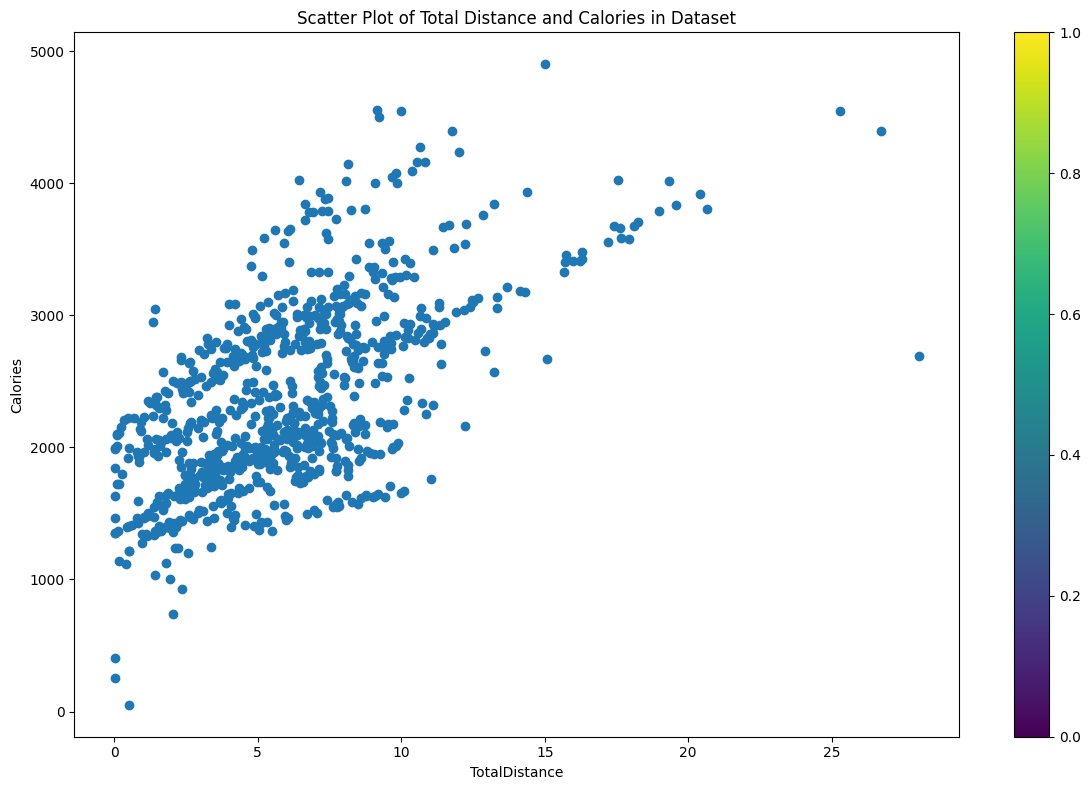

In [27]:
# Scatter plot of  Total Distance and Calories 
plt.figure(figsize=(12,8))
plt.scatter(dailyactivity_df1['TotalDistance'], dailyactivity_df1['Calories'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Total Distance and Calories in Dataset")
 
# Setting the X and Y labels
plt.xlabel('TotalDistance')
plt.ylabel('Calories')
plt.colorbar()
 
plt.show()

Zero records are removed but there are still some outliers with Total Distance close to zero and calories close to zero 

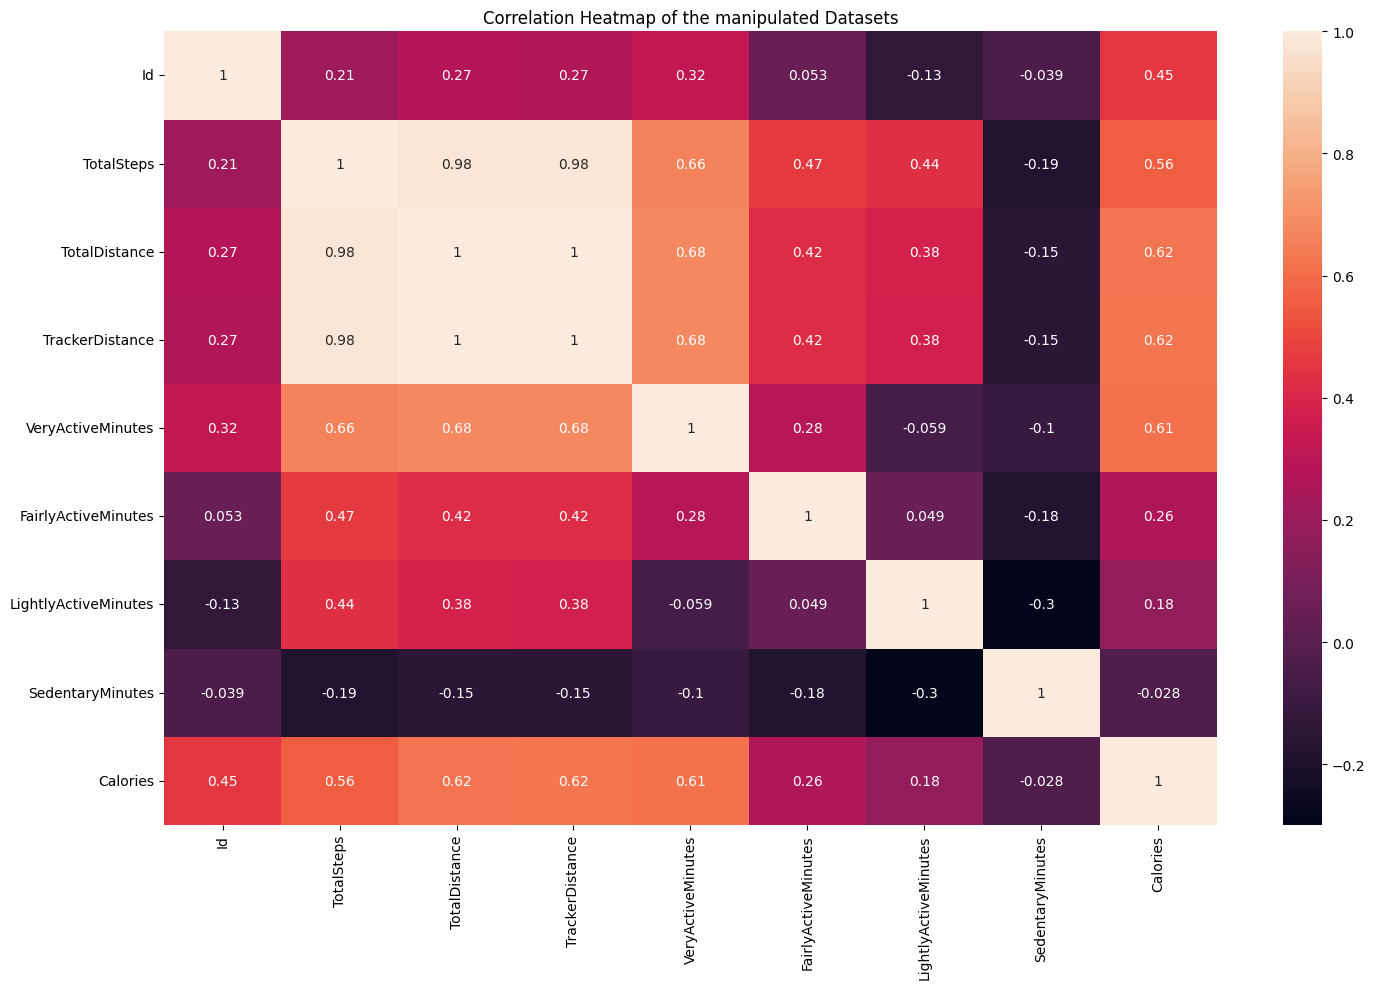

In [33]:
# Now lets look at the heatmap for the final data set

fig, ax = plt.subplots(figsize=(15,10))
plt.rcParams["figure.autolayout"] = True

#create seaborn heatmap
ax = sns.heatmap(dailyactivity_df1.corr(numeric_only=True), annot=True)

# Adding Title to the Plot
ax.set_title("Correlation Heatmap of the manipulated Datasets")
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()

No major difference in correlation. The additional computed weighloss indication of Yes or No does not have a strong correlation with other features of the dataset.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Create a ML Models (i.e., ML Applications) using Decision Tree Classification that could be used to predict weigh loss. Use Grid Search to see if we can determine the best parameters for the dataset.

Decision tree classifier is a type of supervised learning algorithm that can be used to classify data. It does this by creating a decision tree, which is a tree-like structure where each node represents a decision that needs to be made. The leaves of the tree represent the different classes that the data can be classified into.

Decision tree classifiers are often used in business to classify customers into different groups. For example, a bank might use a decision tree classifier to classify customers into high-risk and low-risk groups. The bank could then offer different products and services to each group.

Decision tree classifiers are also used in other areas, like medicine and science. For example, a doctor might use a decision tree classifier to classify patients into different groups based on their symptoms. The doctor could then provide different treatments to each group.

For the modeling, we will drop features with String data types like Id, ActivityDate and weightlossflag as it is not needed for the modeling. 

In [34]:
model_df1 = dailyactivity_df1.copy().dropna()
model_df1.drop('Id', axis=1, inplace=True)
model_df1.drop('ActivityDate', axis=1, inplace=True)

model_df1.head(5)

,TotalSteps,TotalDistance,TrackerDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weightloss
0,13162,8.50,8.50,25,13,328,728,1985,0
1,10735,6.97,6.97,21,19,217,776,1797,1
2,10460,6.74,6.74,30,11,181,1218,1776,1
3,9762,6.28,6.28,29,34,209,726,1745,1
4,12669,8.16,8.16,36,10,221,773,1863,0


In [35]:
#List how many users are in this dataset
print("Number of Records used for Modeling: " , model_df1.shape)

Number of Records used for Modeling:  (862, 9)


In [36]:
## Lets split the data to training and test sets, 70/30 split ratio so that we can assess how well the model 
## can predict weight loss
X = model_df1.drop(['weightloss'], axis = 1)
y = model_df1.weightloss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [37]:
#Building a decision tree baseline model
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

dtc_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier(max_depth=5))
])

In [38]:
%%time
# Train the classifiers
dtc = dtc_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
dtc_pred = dtc.predict(X_test)

# Evaluate Training and Test Scores

dtc_train_score = dtc.score(X_train, y_train)
print("Training Accuracy Score", dtc_train_score)

dtc_test_score = dtc.score(X_test, y_test)
print("Test Accuracy Score", dtc_test_score)


Training Accuracy Score 0.6948590381426202
Test Accuracy Score 0.6216216216216216
CPU times: total: 0 ns
Wall time: 9.28 ms


In [39]:
# Evaluate the performance of the model, we will calculate the accuracy, precision, recall, and f1-score:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, dtc_pred)
precision = precision_score(y_test, dtc_pred, average='macro')
recall = recall_score(y_test, dtc_pred, average='macro')
f1 = f1_score(y_test, dtc_pred, average='macro')

print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1-score: {:.6f}".format(f1))

Accuracy: 0.621622
Precision: 0.631757
Recall: 0.630486
F1-score: 0.621481


To visualize the results, we can use a confusion matrix. A confusion matrix is a table that is used to define the performance of a classification algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The main diagonal of the matrix represents the correct predictions, while the off-diagonal elements represent the incorrect predictions. The overall performance of the model can be calculated by using metrics like accuracy, precision, recall and F1-score by combining the values of TP, FP, TN and FN.

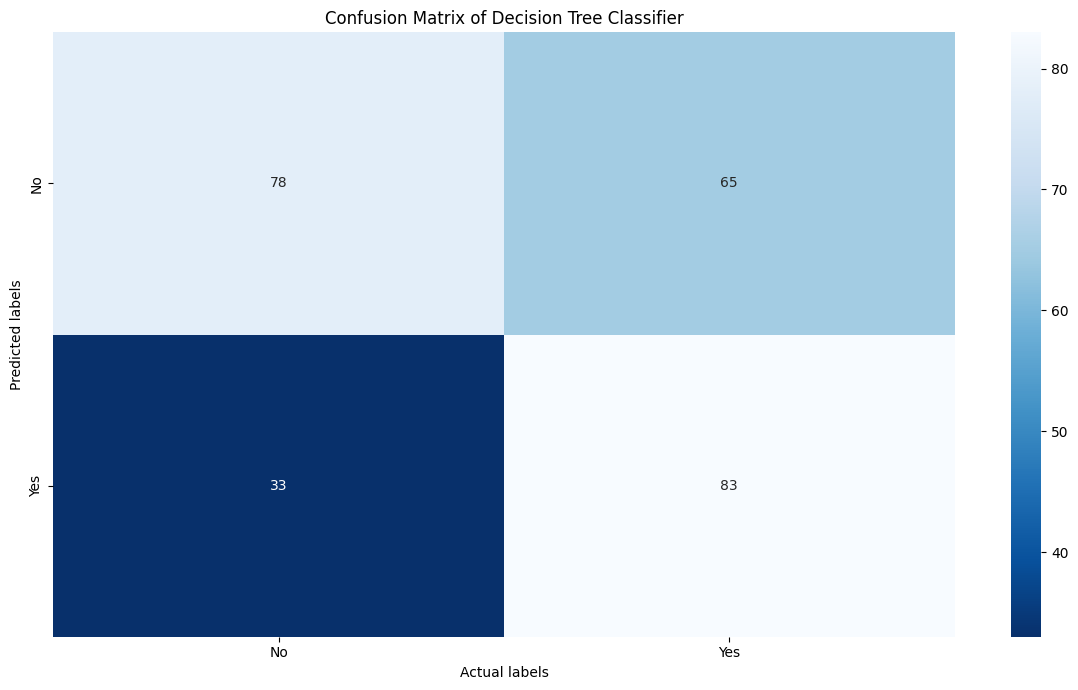

In [40]:
import seaborn as sns
ax= plt.subplot()
conf_matrix = confusion_matrix(y_test, dtc_pred)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues_r', fmt = 'd', ax=ax)

# labels, title and ticks
ax.set_xlabel('Actual labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix of Decision Tree Classifier'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

#plt.xlabel('Predicted')
#plt.ylabel('Actual')
plt.show()

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. A good model is one which has high TP and TN rates, while low FP and FN rates.

With the confusion matrix above for the DecisionTreeClassifier, it has a high number of TP rates with no TN. This combined with an accuracy rate of 0.606178 indicates that the model is good although and the recall and precision values are also above 0.5. Definitions below:
- A low recall score (<0.5) means your classifier has a high number of False negatives which can be an outcome of imbalanced class or untuned model hyperparameters
- A low precision score (<0.5) means your classifier has a high number of False positives which can be an outcome of imbalanced class or untuned model hyperparameters.

With the depth set to 5 and out of those 259 fitbit records, the model classifier predicted 116 times when the user will lose calories and No in 143 times. In reality, 146 fitbit records show burnt calories and 113 fitbit records did not.


Decision Trees can now be plotted with matplotlib using scikit-learn’s tree.plot_tree 

Accuracy of the model is  63%
|--- TotalSteps <= 6153.50
|   |--- Calories <= 2112.00
|   |   |--- LightlyActiveMinutes <= 78.00
|   |   |   |--- class: 1
|   |   |--- LightlyActiveMinutes >  78.00
|   |   |   |--- class: 1
|   |--- Calories >  2112.00
|   |   |--- SedentaryMinutes <= 714.00
|   |   |   |--- class: 1
|   |   |--- SedentaryMinutes >  714.00
|   |   |   |--- class: 1
|--- TotalSteps >  6153.50
|   |--- LightlyActiveMinutes <= 343.50
|   |   |--- Calories <= 3671.00
|   |   |   |--- class: 0
|   |   |--- Calories >  3671.00
|   |   |   |--- class: 0
|   |--- LightlyActiveMinutes >  343.50
|   |   |--- SedentaryMinutes <= 415.00
|   |   |   |--- class: 1
|   |   |--- SedentaryMinutes >  415.00
|   |   |   |--- class: 0



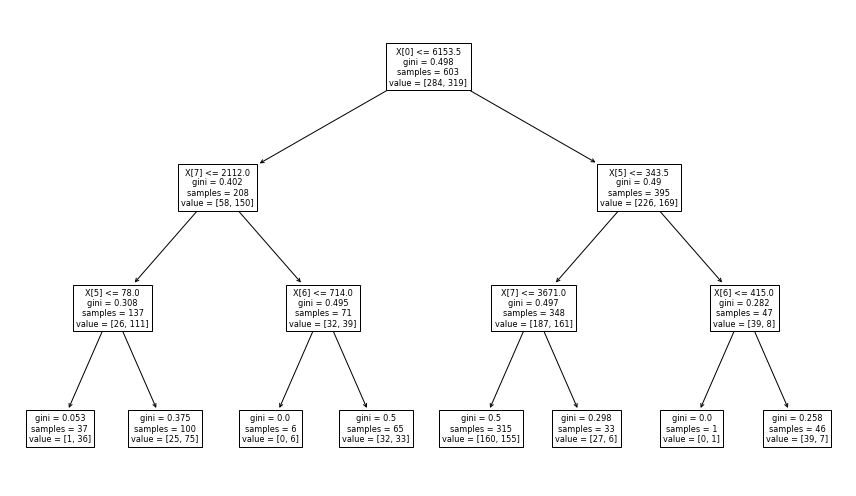

In [36]:
from sklearn import tree

# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
# Step 3: Train the model on the data
clf.fit(X_train, y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
pred_model = clf.predict(X_test)

print('Accuracy of the model is  {:.0%}'.format(accuracy_score(y_test, pred_model)))

tree.plot_tree(clf);

tree2 = export_text(clf, feature_names = list(X.columns))
print(tree2)


Accuracy of the model is  62%


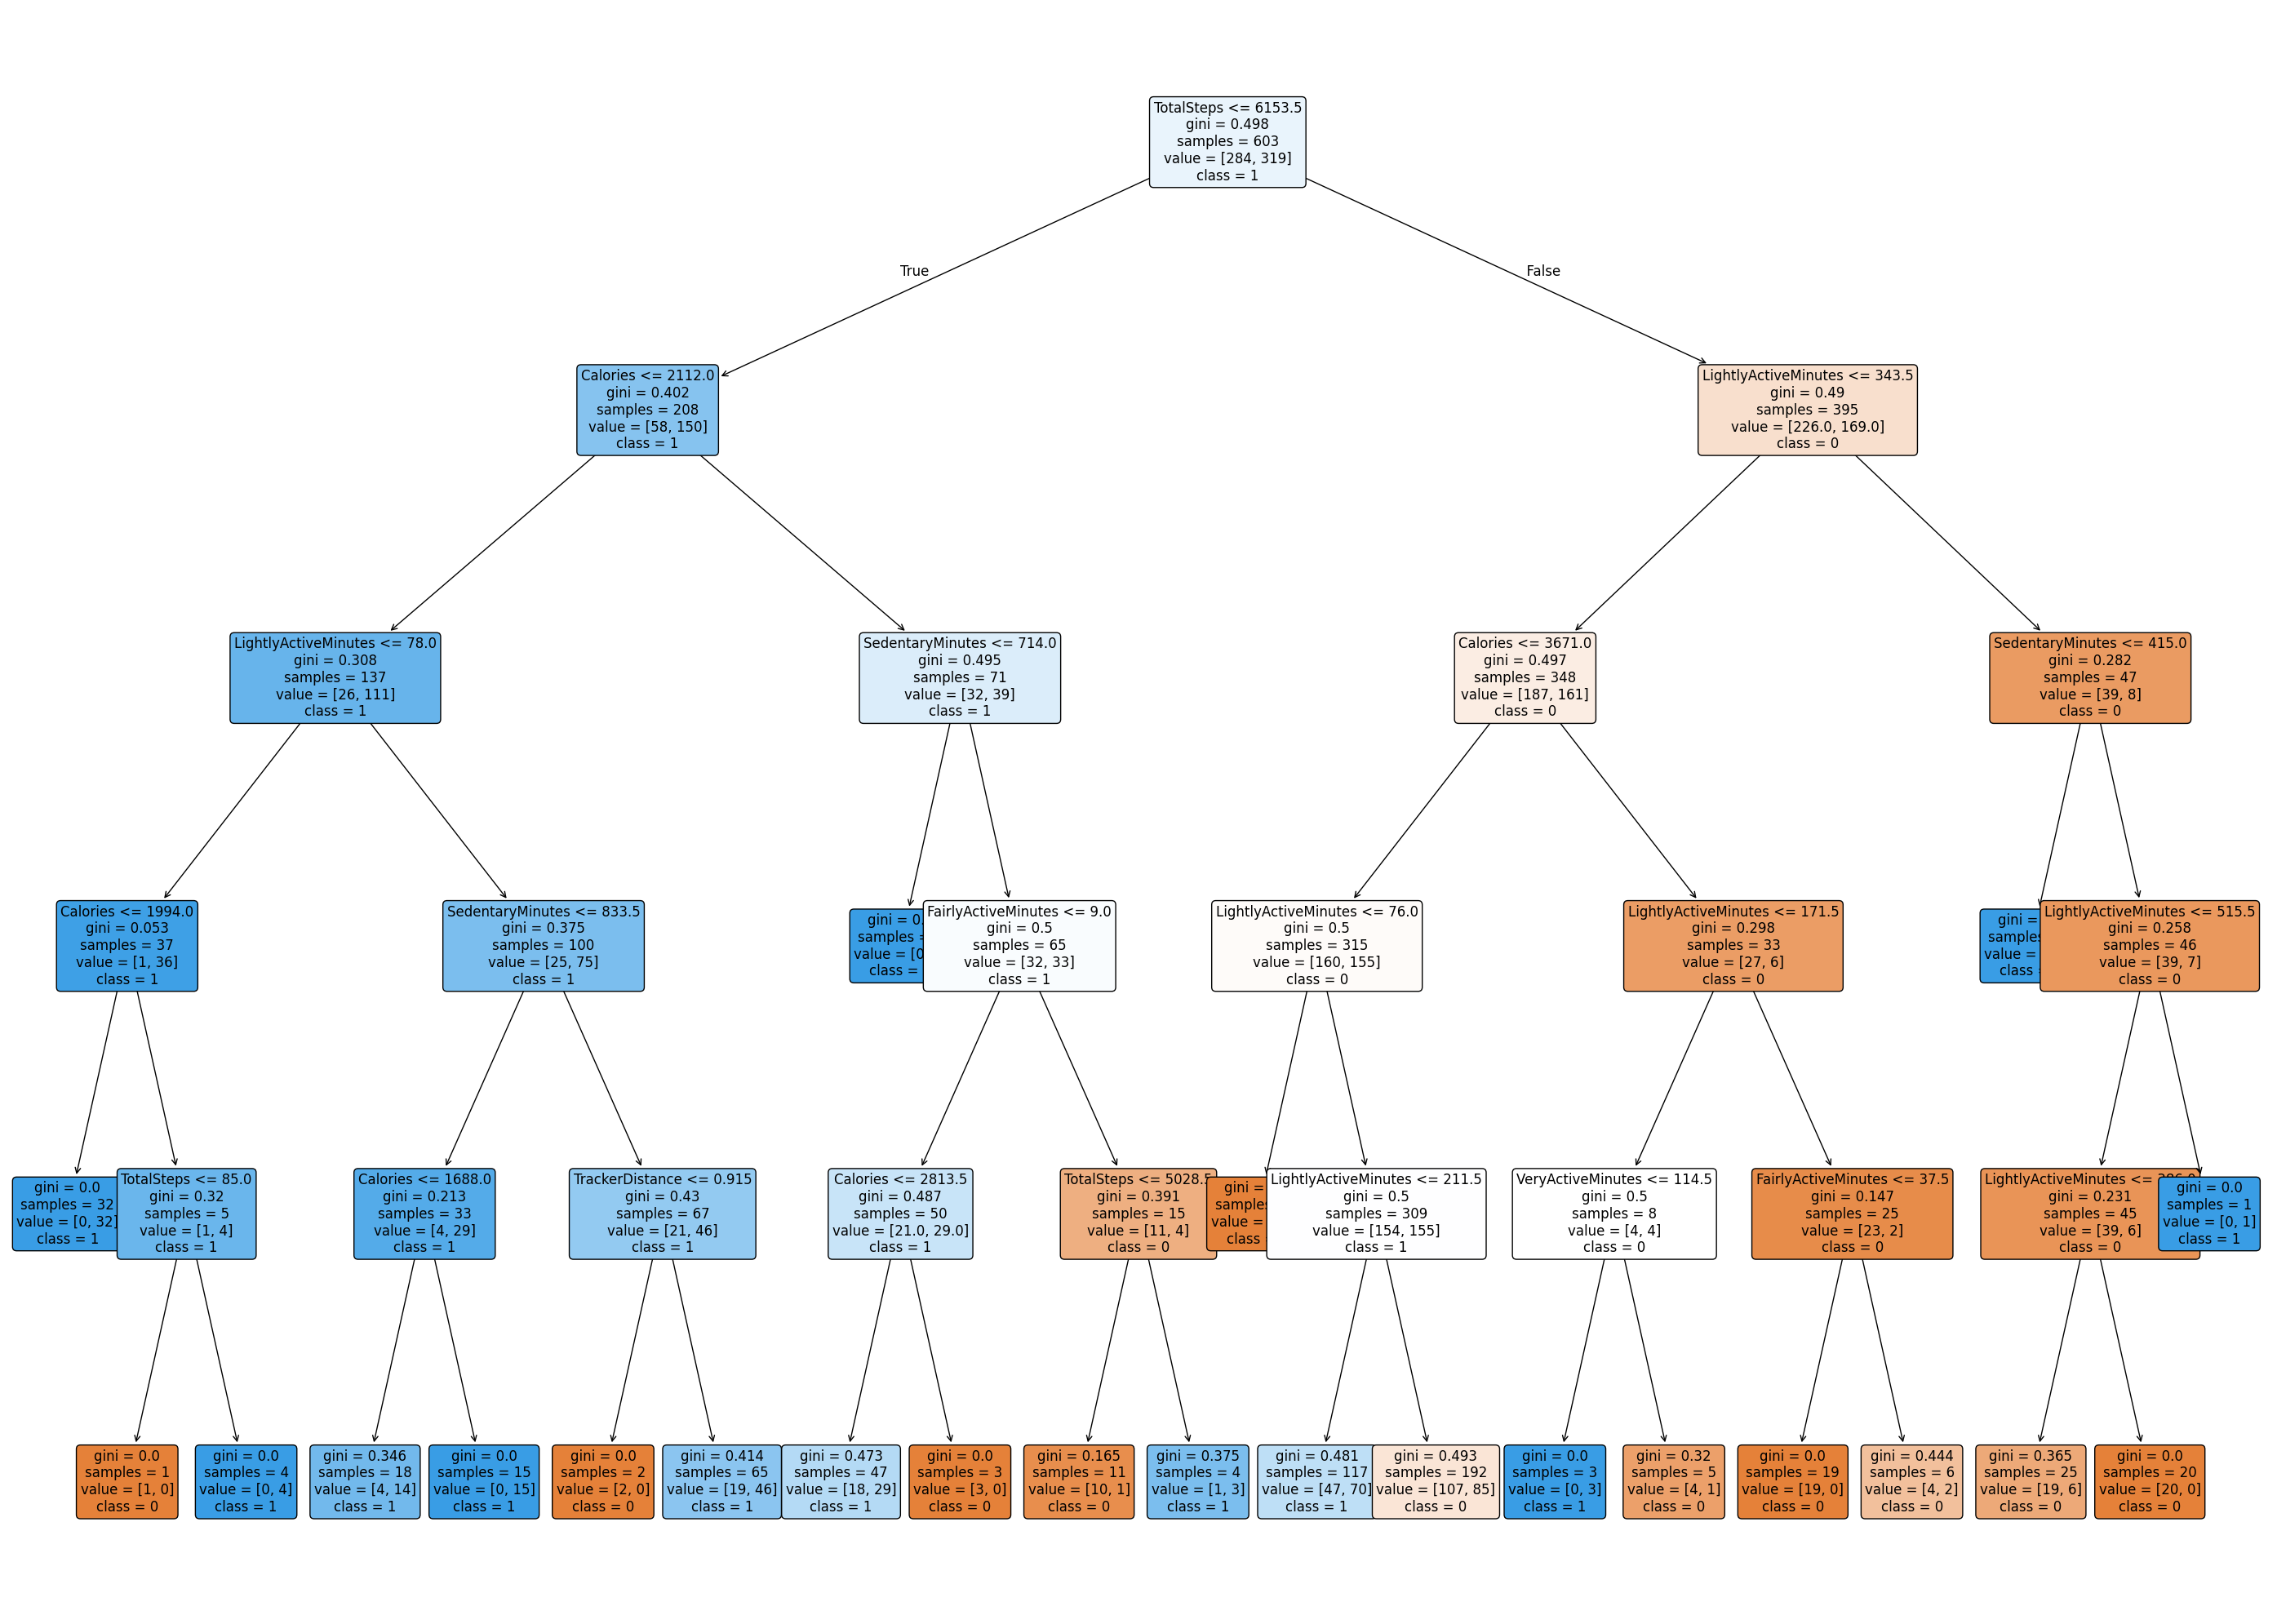

In [41]:
from sklearn import tree

# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 5, random_state = 0)
# Step 3: Train the model on the data
clf.fit(X_train, y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
pred_model1 = clf.predict(X_test)

target_names = model_df1['weightloss'].unique().tolist()

print('Accuracy of the model is  {:.0%}'.format(accuracy_score(y_test, pred_model1)))

fig, ax = plt.subplots(figsize = (28, 20))

tree.plot_tree(clf, feature_names=list(X.columns), 
               class_names = target_names, 
               rounded = True,
               filled=True, ax = ax, fontsize=12);

No great difference in the accuracy of the models using max_depth = 3 or 5. Both models use gini criterion with values of 63% and 62% respectively

Visualize Decision Trees using Graphviz, a popular tool for visualizing data structures, such as the results of a decision tree classifier. 

Create a DTC Model with TotalSteps and TotalDistance as features and weightloss as the target

In [42]:
import graphviz

X1 = model_df1[['TotalSteps', 'TotalDistance']]
y1 = model_df1.weightloss
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)    #It's good practice to check

(603, 2) (603,)
(259, 2) (259,)


In [43]:
# create a model and print the decision tree using GraphViz
# Step 2: Make an instance of the Model
graphviz_clf = DecisionTreeClassifier(max_depth = 5, random_state = 0)
# Step 3: Train the model on the data
graphviz_clf.fit(X1_train, y1_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
graphviz_pred_model1 = graphviz_clf.predict(X1_test)

target_names = model_df1['weightloss'].unique().tolist()

print('Accuracy of the model is  {:.0%}'.format(accuracy_score(y1_test, graphviz_pred_model1)))


Accuracy of the model is  59%


In [44]:
dot_data = tree.export_graphviz(graphviz_clf, out_file=None, 
                      feature_names=['TotalSteps', 'TotalDistance'],  
                      class_names=["No", "Yes"],  
                      filled=True, rounded=True)  
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="../images/fitbit_user_weight_loss_graph_diagram")
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Creating a model with TotalDistance and TotalStep produced a model with 59% accuracy compared with 62% when all the features were used for the model.

#### Modeling with a range of Max Depth
With a 63% accuracy at Max Depth between 3 and 5, let's see if we can get a higher accuracy by running Max Depth from a range of 1 to 10

Text(0.5, 1.0, 'Plot of Criterion Gini & Entropy for Accuracy vs Max_Depth with Splitter = Random')

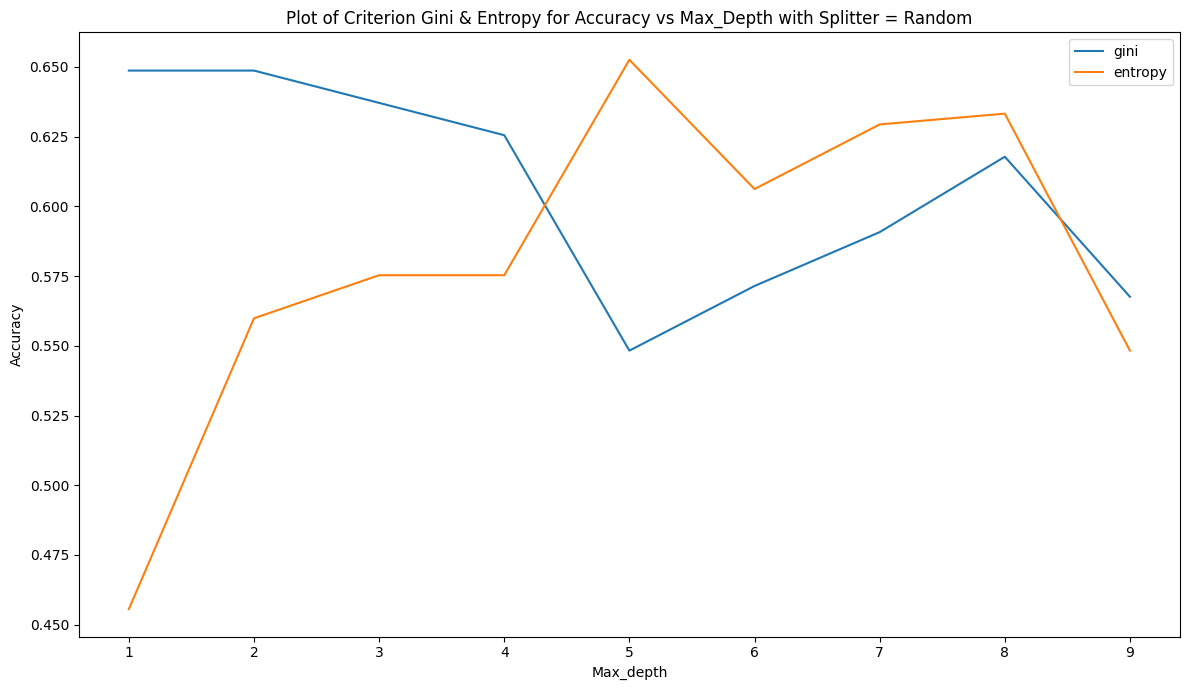

In [45]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,10):
    dtree = DecisionTreeClassifier(criterion ='gini', splitter = 'random', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test, pred))
    ####
    
    dtree = DecisionTreeClassifier(criterion ='entropy', splitter = 'random', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, pred))
    ####
    max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
                 'acc_entropy':pd.Series(acc_entropy),
                 'max_depth':pd.Series(max_depth)})

#visualizing the changes in parameters
plt.figure(figsize = (12, 7))
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')    
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Plot of Criterion Gini & Entropy for Accuracy vs Max_Depth with Splitter = Random')

Text(0.5, 1.0, 'Plot of Criterion Gini & Entropy for Accuracy vs Max_Depth with Splitter = Best')

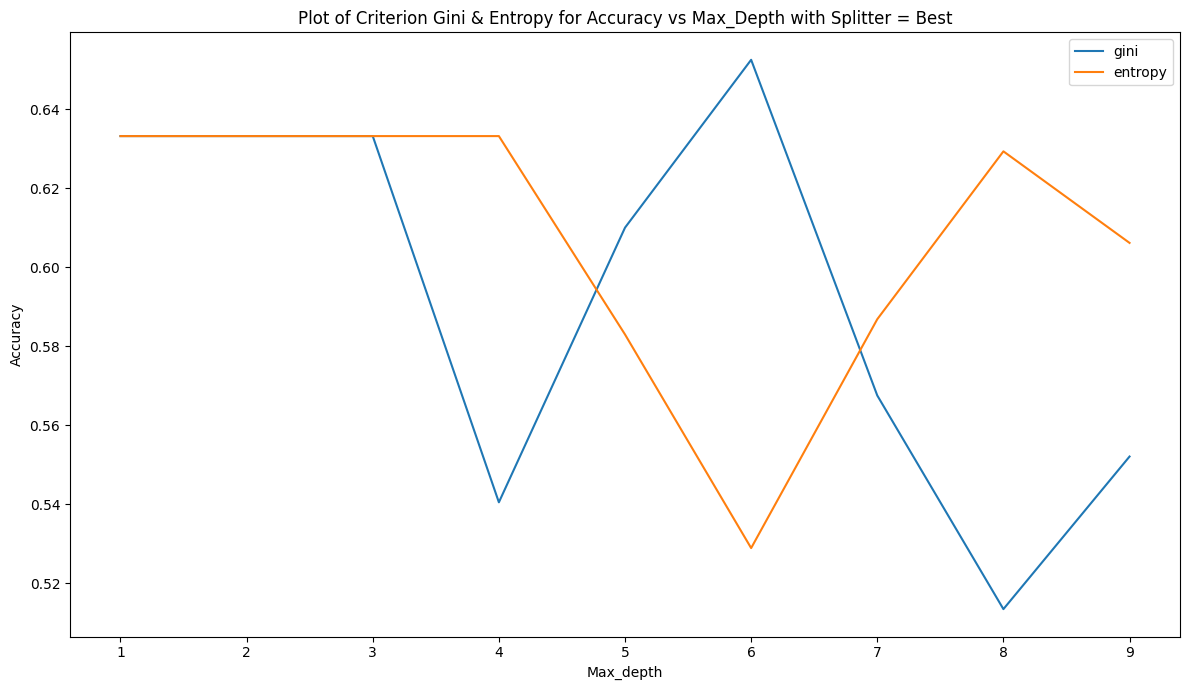

In [46]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,10):
    dtree = DecisionTreeClassifier(criterion ='gini', splitter = 'best', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test, pred))
    ####
    
    dtree = DecisionTreeClassifier(criterion ='entropy', splitter = 'best', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, pred))
    ####
    max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
                 'acc_entropy':pd.Series(acc_entropy),
                 'max_depth':pd.Series(max_depth)})

#visualizing the changes in parameters
plt.figure(figsize = (12, 7))
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')    
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Plot of Criterion Gini & Entropy for Accuracy vs Max_Depth with Splitter = Best')

Looking at the charts for Decision Tree Classifier with Random and Best Splitting illustrates the following:
- For random splitter, highest accuracy was observed with entropy and gini at max depth of 7
- For best splitter, highest accuracy for mini was observed at max depth of 6 for mini while highest accuracy was observed at max depth 4 for entropy Criterion


###  Improving the Model

More feature engineering and exploration. For example, should we keep the gender feature? Why or why not?
Hyperparameter tuning and grid search. All of our models have additional hyperparameters to tune and explore. For example the number of neighbors in KNN or the maximum depth of a Decision Tree.

In [47]:
# Declare the list to store Train Time, Training Accuracy and Test Accuracy
ModelName = []
TrainTime = []
BestScore = []
BestParam = []

In [48]:
#Looking up parameters that can be passed to the pipeline
dtc_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'scale', 'model', 'scale__copy', 'scale__with_mean', 'scale__with_std', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__min_impurity_decrease', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__monotonic_cst', 'model__random_state', 'model__splitter'])

In [49]:
%%time
from sklearn.model_selection import GridSearchCV
#Building a Decision Tree Grid Search - Model 1

# importing the module
import time

# record start time
start = time.time()
 
# parameter grid

#
# Create grid parameters for hyperparameter tuning
#
params =  {
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_depth': [1, 2, 3],
    'model__criterion': ['entropy','gini','log_loss']
}

# Create an instance of GridSearch Cross-validation estimator
#
gsDTC1 = GridSearchCV(estimator=dtc_pipe,
                     param_grid = params,
                     cv=10,
                     verbose=2,
                     n_jobs=1)

# Train the DecisionTreeClassifier Classifier
#
gsDTC1 = gsDTC1.fit(X_train, y_train)
gsDTC1_predicted = gsDTC1.predict(X_test)
#
# Print the training score of the best model
#
print('\nDecision Tree Classifier - Grid Search best score -')
print(gsDTC1.best_score_)

#
# Print the model parameters of the best model
#
print('\nGrid Search best parameters -')
print(gsDTC1.best_params_)

print('\Grid Search CV Results -')
print(gsDTC1.cv_results_)

print("Best parameters set:")
print(gsDTC1.best_estimator_.steps)

#
# Print the test score of the best model
#
clfDTC1 = gsDTC1.best_estimator_
print('Test accuracy: %.3f' % clfDTC1.score(X_test, y_test))

print("Best cross-validation score:", gsDTC1.best_score_)

score1 = gsDTC1.score(X_test, y_test)
print("Test Score :", score1)

# record end time
end = time.time()
 
# printing elapsed time in nanoseconds
print("Time taken", end-start, "secs")

# Assign metrics to variables
ModelName.append('Decision Tree Classifier - Model 1')
TrainTime.append(end-start)
BestScore.append(gsDTC1.best_score_)
BestParam.append(gsDTC1.best_params_)



Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model__criterion=en

In [50]:
#Building a Decision Tree Grid Search - Model 2
# parameter grid

# record start time
start = time.time()

#
# Create grid parameters for hyperparameter tuning
#

param_grid = {'model__max_features': ['auto', 'sqrt', 'log2'],
              'model__ccp_alpha': [0.1, .01, .001],
              'model__max_depth' : [5, 6, 7, 8, 9],
              'model__criterion' :['gini', 'entropy']
             }

# Create an instance of GridSearch Cross-validation estimator
#
gsDTC2 = GridSearchCV(estimator=dtc_pipe,
                     param_grid = param_grid,
                     cv=10,
                     verbose=2,
                     n_jobs=1)

# Train the DecisionTreeClassifier Classifier
#
gsDTC2 = gsDTC2.fit(X_train, y_train)
gsDTC2_predicted = gsDTC2.predict(X_test)
#
# Print the training score of the best model
#
print('\nDecision Tree Classifier - Grid Search best score -')
print(gsDTC2.best_score_)

#
# Print the model parameters of the best model
#
print('\nGrid Search best parameters -')
print(gsDTC2.best_params_)

print('\Grid Search CV Results -')
print(gsDTC2.cv_results_)

print("Best parameters set:")
print(gsDTC2.best_estimator_.steps)

#
# Print the test score of the best model
#
clfDTC2 = gsDTC2.best_estimator_
print('Test accuracy: %.3f' % clfDTC2.score(X_test, y_test))

print("Best cross-validation score:", gsDTC2.best_score_)

score2 = gsDTC2.score(X_test, y_test)
print("Test Score :", score2)

# record end time
end = time.time()
 
# printing elapsed time in nanoseconds
print("Time taken", end-start, "secs")


# Assign metrics to variables
ModelName.append('Decision Tree Classifier - Model 2')
TrainTime.append(end-start)
BestScore.append(gsDTC2.best_score_)
BestParam.append(gsDTC2.best_params_)


Fitting 10 folds for each of 90 candidates, totalling 900 fits
[CV] END model__ccp_alpha=0.1, model__criterion=gini, model__max_depth=5, model__max_features=auto; total time=   0.0s
[CV] END model__ccp_alpha=0.1, model__criterion=gini, model__max_depth=5, model__max_features=auto; total time=   0.0s
[CV] END model__ccp_alpha=0.1, model__criterion=gini, model__max_depth=5, model__max_features=auto; total time=   0.0s
[CV] END model__ccp_alpha=0.1, model__criterion=gini, model__max_depth=5, model__max_features=auto; total time=   0.0s
[CV] END model__ccp_alpha=0.1, model__criterion=gini, model__max_depth=5, model__max_features=auto; total time=   0.0s
[CV] END model__ccp_alpha=0.1, model__criterion=gini, model__max_depth=5, model__max_features=auto; total time=   0.0s
[CV] END model__ccp_alpha=0.1, model__criterion=gini, model__max_depth=5, model__max_features=auto; total time=   0.0s
[CV] END model__ccp_alpha=0.1, model__criterion=gini, model__max_depth=5, model__max_features=auto; tota

### Results



In [51]:
# Display results in a Dataframe
dict = {'Model':ModelName, 'Train Time(s)': TrainTime, 'Best Params': BestParam, 'Best Score': BestScore }
results_comp_df = pd.DataFrame(dict).set_index('Model')
results_comp_df

,Train Time(s),Best Params,Best Score
Model,,,
Decision Tree Classifier - Model 1,1.164984,"{'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1}",0.593852
Decision Tree Classifier - Model 2,3.635779,"{'model__ccp_alpha': 0.001, 'model__criterion': 'gini', 'model__max_depth': 6, 'model__max_features': 'sqrt'}",0.621831


Decision Tree Classifier - Model 2 performed better with additional parameters like ccp_alpha and max_features.

### Comparing Grid Searches

In the modeling above, we have looked at Decision Tree Classifiers, performed hyper parameter tuning and the Best score is between 60 to 65%. In this Section, we will explore four grid search options using the same parameter selections for the `DecisionTreeClassifier`. 

The following search options  will be model to compare the accuracy score and some other metrices like time
- `GridSearchCV`
- `RandomizedSearchCV`
- `HalvingGridSearchCV`
- `HalvingRandomSearchCV`

In [52]:
params_grid_search = {'max_depth': [2,5,10],
         'min_samples_split': [2, 4, 6],
          'criterion': ['gini','entropy'],
          'min_samples_leaf': [1,2,3,4,5]
         }

In [53]:
X2 = model_df1[['TotalSteps', 'TotalDistance']]
y2 = model_df1.weightloss
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)    #It's good practice to check

(603, 2) (603,)
(259, 2) (259,)


In [54]:
#%%timeit

grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params_grid_search).fit(X2_train, y2_train)
grid_train_acc = grid.score(X2_train, y2_train)
grid_test_acc = grid.score(X2_test, y2_test)
best_params = grid.best_params_

print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Trest Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')
print('Best Criterion:', grid.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', grid.best_estimator_.get_params()['min_samples_leaf'])
print('Best Score:', grid.best_score_)
print('Refit Time:', grid.refit_time_)
#print('Std Fit Time:', grid.best_estimator_.get_params()['std_fit_time'])



print('Std Fit Time:', grid.cv_results_['std_fit_time'].sum())
print('Std Score Time:', grid.cv_results_['std_score_time'].sum())

print('Mean Fit Time:', grid.cv_results_['mean_fit_time'].sum())
print('Mean Score Time:', grid.cv_results_['mean_score_time'].sum())

mean_fit_time= grid.cv_results_['mean_fit_time']
mean_score_time= grid.cv_results_['mean_score_time']
n_splits  =grid.n_splits_ #number of splits of training data
n_iter = pd.DataFrame(grid.cv_results_).shape[0] #Iterations per split

print('Elapsed Time:', np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter)
elapsed_time = (np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter)

print(sorted(grid.cv_results_.keys()))

data = [ ['GridSearchCV', grid.best_estimator_.get_params()['criterion'], grid_train_acc, grid_test_acc ,
       grid.best_estimator_.get_params()['max_depth'],grid.best_score_,
        grid.best_estimator_.get_params()['min_samples_leaf'], grid.best_estimator_.get_params()['min_samples_split'], elapsed_time] ]
grid_df = pd.DataFrame(data, columns = ['CV Method', 'Criterion', 'Training Accuracy', 'Test Accuracy','Max Depth',
                                   'Best Score','Min Samples Leaf','Min Samples Split','Elapsed Time'])

grid_df

   

Training Accuracy:  0.62
Trest Accuracy:  0.63
Best parameters of tree: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Criterion: gini
Best max_depth: 2
Best min_samples_leaf: 1
Best Score: 0.6120385674931129
Refit Time: 0.0010366439819335938
Std Fit Time: 0.02838702069039304
Std Score Time: 0.016250028944749525
Mean Fit Time: 0.15304927825927733
Mean Score Time: 0.07365989685058594
Elapsed Time: 1.1335458755493166
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


,CV Method,Criterion,Training Accuracy,Test Accuracy,Max Depth,Best Score,Min Samples Leaf,Min Samples Split,Elapsed Time
0,GridSearchCV,gini,0.623549,0.633205,2,0.612039,1,2,1.133546


In [55]:
dfresults = pd.DataFrame(grid.cv_results_)
dfresults.head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002508,0.000686,0.001670,0.000496,gini,2,1,2,"{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}",0.61157,0.570248,0.595041,0.65,0.633333,0.612039,0.028036,1
1,0.001981,0.000402,0.001097,0.000123,gini,2,1,4,"{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4}",0.61157,0.570248,0.595041,0.65,0.633333,0.612039,0.028036,1
2,0.001722,0.000508,0.001268,0.000787,gini,2,1,6,"{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 6}",0.61157,0.570248,0.595041,0.65,0.633333,0.612039,0.028036,1
3,0.002479,0.000979,0.001241,0.000659,gini,2,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}",0.61157,0.570248,0.595041,0.65,0.633333,0.612039,0.028036,1


In [67]:
grid = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), params_grid_search).fit(X2_train, y2_train)
grid_train_acc = grid.score(X2_train, y2_train)
grid_test_acc = grid.score(X2_test, y2_test)
best_params = grid.best_params_

print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Trest Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')
print('Best Criterion:', grid.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', grid.best_estimator_.get_params()['min_samples_leaf'])
print('Best Score:', grid.best_score_)
print('Refit Time:', grid.refit_time_)

print('Std Fit Time:', grid.cv_results_['std_fit_time'].sum())
print('Std Score Time:', grid.cv_results_['std_score_time'].sum())

print('Mean Fit Time:', grid.cv_results_['mean_fit_time'].sum())
print('Mean Score Time:', grid.cv_results_['mean_score_time'].sum())

mean_fit_time= grid.cv_results_['mean_fit_time']
mean_score_time= grid.cv_results_['mean_score_time']
n_splits  =grid.n_splits_ #number of splits of training data
n_iter = pd.DataFrame(grid.cv_results_).shape[0] #Iterations per split

print('Elapsed Time:', np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter)
elapsed_time = (np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter)

   
new_row = pd.Series(data={'CV Method':'RandomizedSearchCV', 'Criterion':grid.best_estimator_.get_params()['criterion'], 
                          'Training Accuracy': grid_train_acc, 'Test Accuracy': grid_test_acc,
                          'Max Depth': grid.best_estimator_.get_params()['max_depth'], 'Best Score': grid.best_score_,
                          'Min Samples Leaf': grid.best_estimator_.get_params()['min_samples_leaf'], 
                          'Min Samples Split': grid.best_estimator_.get_params()['min_samples_split'], 
                          'Elapsed Time': elapsed_time  })


grid_df = pd.concat([grid_df, new_row], ignore_index=True)
                           
grid_df


Training Accuracy:  0.62
Trest Accuracy:  0.63
Best parameters of tree: {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 2, 'criterion': 'gini'}
Best Criterion: gini
Best max_depth: 2
Best min_samples_leaf: 3
Best Score: 0.6120385674931129
Refit Time: 0.0034308433532714844
Std Fit Time: 0.009292617929675515
Std Score Time: 0.007239586443115075
Mean Fit Time: 0.05354022979736328
Mean Score Time: 0.027011966705322268
Elapsed Time: 0.40276098251342773


,CV Method,Criterion,Training Accuracy,Test Accuracy,Max Depth,Best Score,Min Samples Leaf,Min Samples Split,Elapsed Time,0
0,GridSearchCV,gini,0.623549,0.633205,2.0,0.612039,1.0,2.0,1.133546,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RandomizedSearchCV
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gini
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.623549
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.633205
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.612039
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.402761


In [69]:
grid = HalvingGridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params_grid_search).fit(X2_train, y2_train)
grid_train_acc = grid.score(X2_train, y2_train)
grid_test_acc = grid.score(X2_test, y2_test)
best_params = grid.best_params_

print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Trest Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')
print('Best Criterion:', grid.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', grid.best_estimator_.get_params()['min_samples_leaf'])
print('Best Score:', grid.best_score_)
#print('Fit Score:', grid.fit_time_)

print('Std Fit Time:', grid.cv_results_['std_fit_time'].sum())
print('Std Score Time:', grid.cv_results_['std_score_time'].sum())

print('Mean Fit Time:', grid.cv_results_['mean_fit_time'].sum())
print('Mean Score Time:', grid.cv_results_['mean_score_time'].sum())

mean_fit_time= grid.cv_results_['mean_fit_time']
mean_score_time= grid.cv_results_['mean_score_time']
n_splits  =grid.n_splits_ #number of splits of training data
n_iter = pd.DataFrame(grid.cv_results_).shape[0] #Iterations per split

print('Elapsed Time:', np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter)
elapsed_time = (np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter)

new_row = pd.Series(data={'CV Method':'HalvingGridSearchCV', 'Criterion':grid.best_estimator_.get_params()['criterion'], 
                          'Training Accuracy': grid_train_acc, 'Test Accuracy': grid_test_acc,
                          'Max Depth': grid.best_estimator_.get_params()['max_depth'], 'Best Score': grid.best_score_,
                          'Min Samples Leaf': grid.best_estimator_.get_params()['min_samples_leaf'], 
                          'Min Samples Split': grid.best_estimator_.get_params()['min_samples_split'], 
                          'Elapsed Time': elapsed_time }  )


grid_df = pd.concat([grid_df, pd.DataFrame([new_row])], ignore_index=True)
                           
grid_df


Training Accuracy:  0.62
Trest Accuracy:  0.63
Best parameters of tree: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Criterion: gini
Best max_depth: 2
Best min_samples_leaf: 4
Best Score: 0.6190896503980616
Std Fit Time: 0.06941637043685757
Std Score Time: 0.046673504493108656
Mean Fit Time: 0.24189162254333496
Mean Score Time: 0.1540637493133545
Elapsed Time: 1.979776859283447


,CV Method,Criterion,Training Accuracy,Test Accuracy,Max Depth,Best Score,Min Samples Leaf,Min Samples Split,Elapsed Time,0
0,GridSearchCV,gini,0.623549,0.633205,2.0,0.612039,1.0,2.0,1.133546,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RandomizedSearchCV
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gini
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.623549
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.633205
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.612039
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.402761


In [54]:
grid = HalvingRandomSearchCV(DecisionTreeClassifier(random_state = 42), params_grid_search).fit(X2_train, y2_train)
grid_train_acc = grid.score(X2_train, y2_train)
grid_test_acc = grid.score(X2_test, y2_test)
best_params = grid.best_params_

tmp = grid.best_estimator_.get_params()['criterion']
print(tmp)

print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Trest Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')
print('Best Criterion:', grid.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', grid.best_estimator_.get_params()['min_samples_leaf'])
print('Best Score:', grid.best_score_)
#print('Fit Score:', grid.fit_time_)

print('Std Fit Time:', grid.cv_results_['std_fit_time'].sum())
print('Std Score Time:', grid.cv_results_['std_score_time'].sum())

print('Mean Fit Time:', grid.cv_results_['mean_fit_time'].sum())
print('Mean Score Time:', grid.cv_results_['mean_score_time'].sum())

mean_fit_time= grid.cv_results_['mean_fit_time']
mean_score_time= grid.cv_results_['mean_score_time']
n_splits  =grid.n_splits_ #number of splits of training data
n_iter = pd.DataFrame(grid.cv_results_).shape[0] #Iterations per split

print('Elapsed Time:', np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter)
elapsed_time = (np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter)

new_row = pd.Series(data={'CV Method':'HalvingRandomSearchCV', 'Criterion':grid.best_estimator_.get_params()['criterion'], 
                          'Training Accuracy': grid_train_acc, 'Test Accuracy': grid_test_acc,
                          'Max Depth': grid.best_estimator_.get_params()['max_depth'], 'Best Score': grid.best_score_,
                          'Min Samples Leaf': grid.best_estimator_.get_params()['min_samples_leaf'], 
                          'Min Samples Split': grid.best_estimator_.get_params()['min_samples_split'], 
                          'Elapsed Time': elapsed_time})


grid_df = grid_df.append(new_row, ignore_index=True)
                           

grid_df.reset_index()
  
display(grid_df)

entropy
Training Accuracy:  0.62
Trest Accuracy:  0.63
Best parameters of tree: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 2, 'criterion': 'entropy'}
Best Criterion: entropy
Best max_depth: 2
Best min_samples_leaf: 5
Best Score: 0.6265143648321219
Std Fit Time: 0.0063074725242226164
Std Score Time: 0.005367105613236843
Mean Fit Time: 0.07043790817260742
Mean Score Time: 0.046039390563964847
Elapsed Time: 0.5823864936828612


,CV Method,Criterion,Training Accuracy,Test Accuracy,Max Depth,Best Score,Min Samples Leaf,Min Samples Split,Elapsed Time
0,GridSearchCV,gini,0.623549,0.633205,2,0.612039,1,2,1.379110
1,RandomizedSearchCV,entropy,0.623549,0.633205,2,0.612039,4,4,0.159517
2,HalvingGridSearchCV,entropy,0.623549,0.633205,2,0.607927,4,4,1.583052
3,HalvingRandomSearchCV,entropy,0.623549,0.633205,2,0.626514,5,2,0.582386


#### Results Visualization
Let's review some of the results above using visualizations

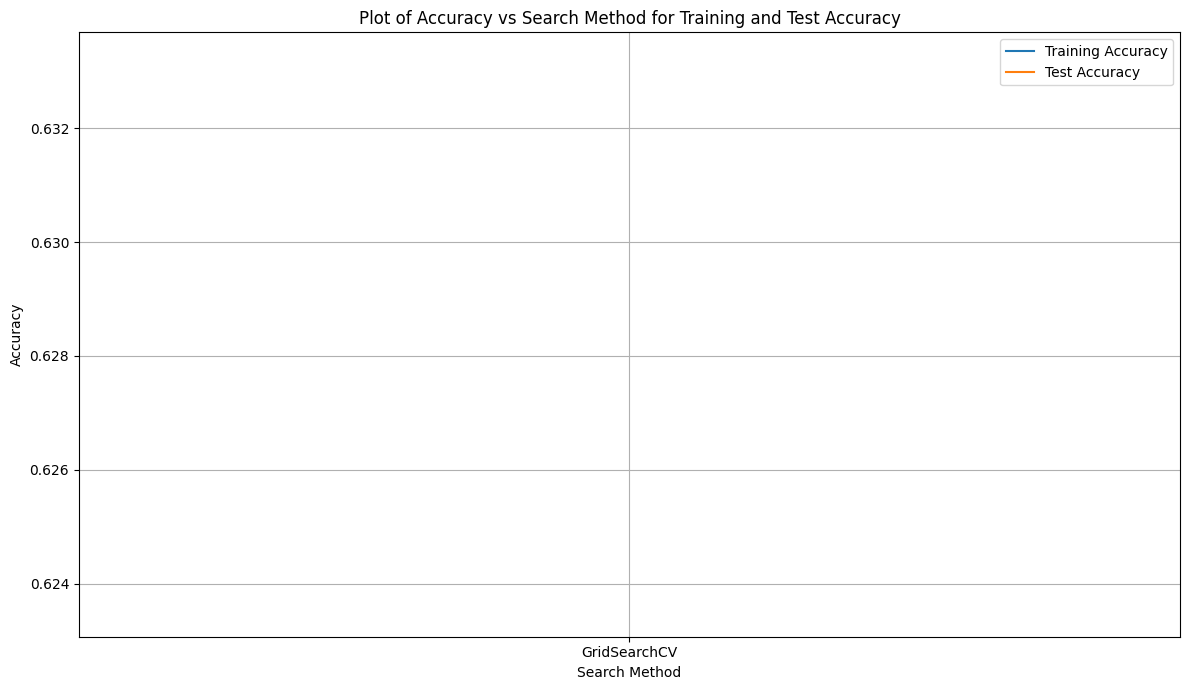

In [62]:
#visualizing the accuracy scores using a plot graph
plt.figure(figsize = (12, 7))
plt.grid(visible=True)
plt.plot('CV Method','Training Accuracy', data=grid_df, label='Training Accuracy')
plt.plot('CV Method','Test Accuracy', data=grid_df, label='Test Accuracy')    
plt.xlabel('Search Method')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy vs Search Method for Training and Test Accuracy')
plt.legend()

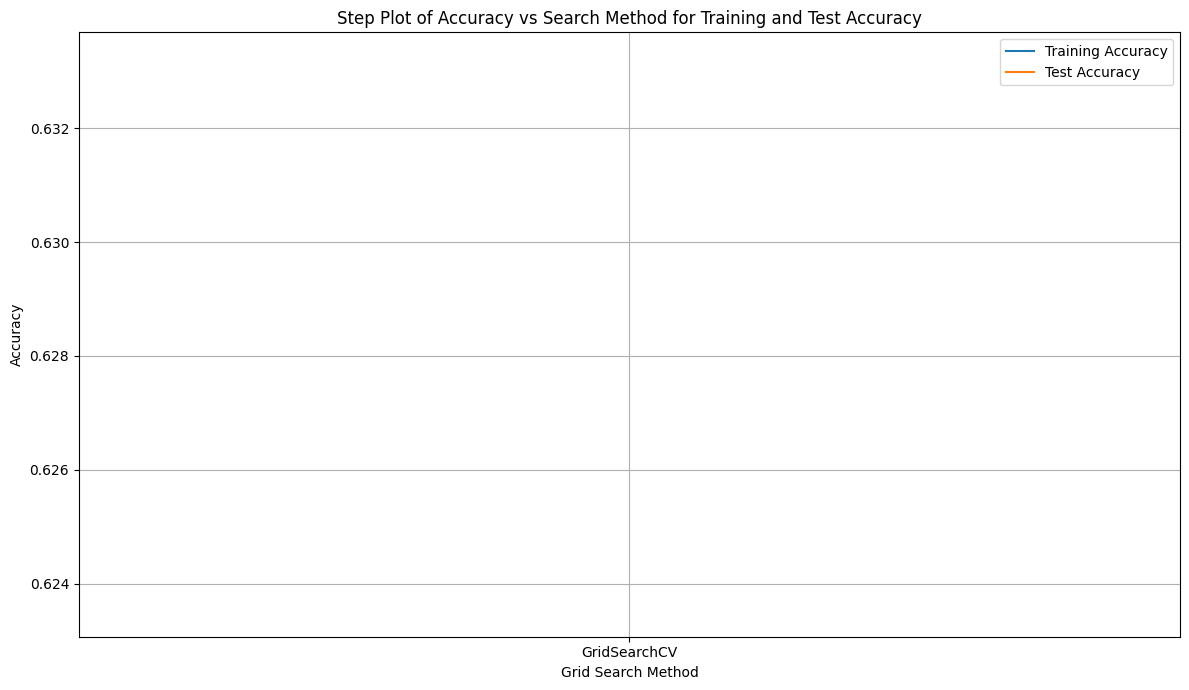

In [63]:
#visualizing the accuracy scores using a step graph
plt.figure(figsize = (12, 7))
plt.grid(visible=True)
plt.step('CV Method','Training Accuracy', data=grid_df, label='Training Accuracy')
plt.step('CV Method','Test Accuracy', data=grid_df, label='Test Accuracy')    
plt.xlabel('Grid Search Method')
plt.ylabel('Accuracy')
plt.title('Step Plot of Accuracy vs Search Method for Training and Test Accuracy')
plt.legend()

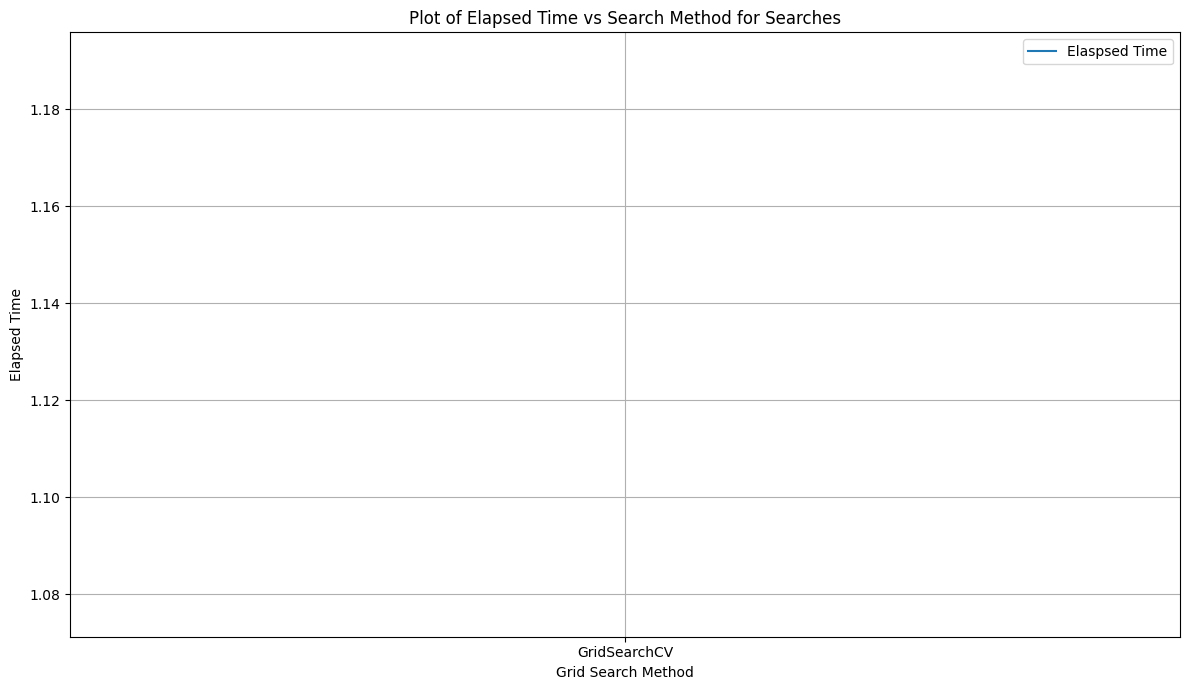

In [ ]:
#visualizing of the elapsed time for Search methods
plt.figure(figsize = (12, 7))
plt.step('CV Method','Elapsed Time', data=grid_df, label='Elaspsed Time')
plt.grid(True)
plt.xlabel('Grid Search Method')
plt.ylabel('Elapsed Time')
plt.title('Plot of Elapsed Time vs Search Method for Searches')
plt.legend()


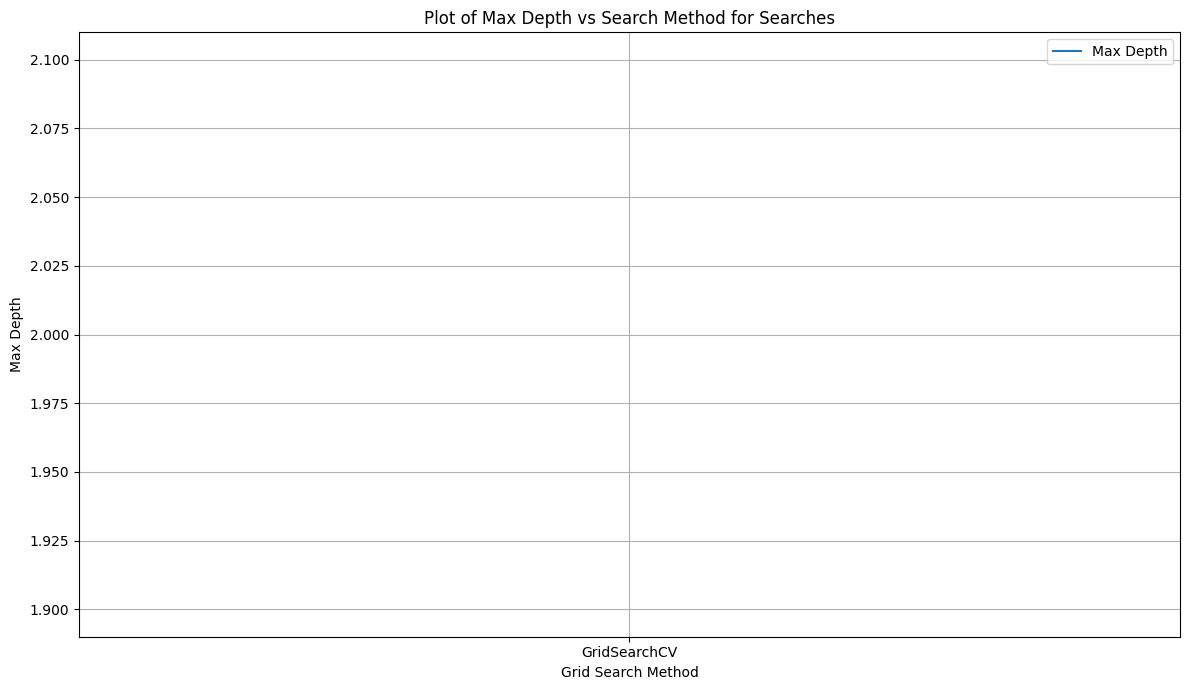

In [65]:
#visualizing the max depth for search methods
plt.figure(figsize = (12, 7))
plt.grid(True)
plt.step('CV Method','Max Depth', data=grid_df, label='Max Depth')
 
plt.xlabel('Grid Search Method')
plt.ylabel('Max Depth')
plt.title('Plot of Max Depth vs Search Method for Searches')
plt.legend()

Running GridSearch with the three CV Method produced similar results, HalvingGridSearchCV with entropy criterion produced a slightly higher Training accuracy but lower test accuracy. Max Depth was set to 2 for the best results

### Findings


For this notebook with Decision Tree Classifier modeling on whether a user would lose weight, created a number of models using different parameters with the following results:
- Using a StandardScaler and setting the max_depth to 5, fitting the model using full features and predicting based on test data produced a training score of 68% and Test scores of 61%
- The confusion matrix at max_depth = 5 ran the classification over 259 Fitbit records the model classifier predicted 116 times when the user will lose calories and No in 143 times. In reality, 146 Fitbit records show burnt calories and 113 Fitbit records did not.
- Ran the model with Max Depth range from 1 to 10 using different splitters, random produced highest accuracy was observed with entropy and gini at max depth of 7 and best produced highest accuracy for mini at max depth of 6
- Running GridSearchCV with two different parameters, two models were built and model 2 performed better with additional parameters like ccp_alpha and max_features with a score of 61%
- Ran additional models using different grid searches (i.e., Randomized, Halving and HalvingRandomized) cross validation, results were similar, but HalvingGridSearchCV with entropy criterion produced a slightly higher Training accuracy but lower test accuracy

Overall, with the different models built and tested, the average accuracy score is in the 60% range.